# Analysis on break and enter crime in Toronto from 2014 to 2019

## Introduction

The aim of this project is to find a safe and secure location for living or opening a business in Toronto, Canada. Specifically, this report will be targeted to the break and enter crime situation over the past 5 years in different neigborhood in Toronto. <br />
We will make use of our data science tools to analyse data and focus on the trend of each borough from 2014 to 2019, and will focus on the 2019 data specifically to choose the safest and most dangerous boroughs by analysing crime data and short listing the neighbourhood.

## Data

Based on definition of our problem, factors that will influence our decision are:  <br />
finding the most dangerous borough based on crime statistics in 2019  <br />
finding the trend of beak and enter crime for each borough <br />
We will be using the geographical coordinates of Toronto to plot neighbourhoods in a borough that is dangerous and in the city's vicinity, and finally cluster our neighborhoods and present our findings.  <br />
Following data sources will be needed to extract/generate the required information:  <br />
Part 1: Using a real world data set from Tronto Police Service website: A dataset consisting of the crime statistics of each Neighbourhood in Toronto along with location, recorded year, premise type.  <br />
dataset URL: https://data.torontopolice.on.ca/datasets/break-and-enter-2014-to-2019/data https://prod-hub-indexer.s3.amazonaws.com/files/d9b3dd6402454c379ba57994230aabea/0/full/3857/d9b3dd6402454c379ba57994230aabea_0_full_3857.csv  <br />
Part 2: Gathering additional information of the list of officially categorized boroughs in Toronto: Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.  <br />
dataset URL: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  <br />
Part 3: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.: This data will be fetched using OpenCage Geocoder to find the safest and most dangerous borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis. <br />

### Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
! pip install folium==0.5.0
import folium # plotting library

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.2.2
     |████████████████████████████████| 79 kB 7.9 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=32277e67d486e63a4c08e5104c5b263146839da273e0fa70abe1a78bd5e708bf
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported


In [2]:
tor_crime_df = pd.read_csv('https://prod-hub-indexer.s3.amazonaws.com/files/d9b3dd6402454c379ba57994230aabea/0/full/3857/d9b3dd6402454c379ba57994230aabea_0_full_3857.csv', index_col=None)
tor_crime_df.drop(['Index_','event_unique_id', 'occurrencedate', 'reporteddate','reportedday','offence','ucr_code','ucr_ext','reporteddayofyear','occurrenceyear','occurrencemonth','occurrencedayofweek','reportedhour','occurrenceday','occurrencedayofyear','occurrencehour','X', 'Y'], axis = 1, inplace = True)
tor_crime_df.head()

,premisetype,reportedyear,reportedmonth,reporteddayofweek,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,Commercial,2014,January,Sunday,Break and Enter,D41,119,Wexford/Maryvale (119),43.746101,-79.291,1
1,House,2014,January,Sunday,Break and Enter,D23,6,Kingsview Village-The Westway (6),43.697083,-79.559,2
2,Commercial,2014,January,Monday,Break and Enter,D53,39,Bedford Park-Nortown (39),43.712334,-79.428,3
3,Apartment,2014,January,Tuesday,Break and Enter,D43,138,Eglinton East (138),43.745304,-79.238,4
4,Apartment,2014,January,Wednesday,Break and Enter,D51,74,North St.James Town (74),43.667297,-79.374,5


### Methodology

Categorized the methodologysection into two parts: <br />
Exploratory Data Analysis: Visualise the crime repots in different Toronto district to idenity the 10 most dangerous area. Also to see the trend of each year <br />
Modelling: To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. <br />
We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

#### see the trend for the break and enter from 2014 to 2019

In [5]:
year_df = tor_crime_df.groupby('reportedyear')['Division'].count().reset_index()
year_df.set_index('reportedyear', inplace=True)
year_df

,Division
reportedyear,
2014,7179
2015,6900
2016,6398
2017,6882
2018,7557
2019,8386


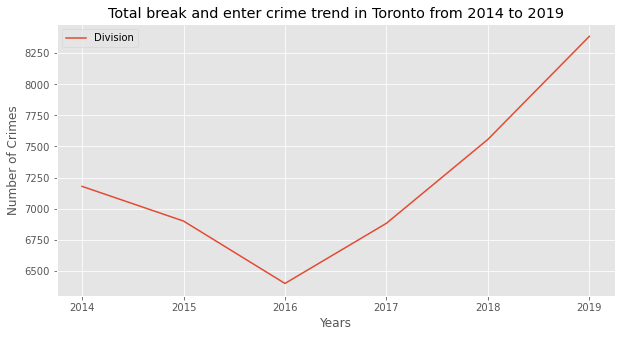

In [9]:
year_df.index = year_df.index.map(int) # let's change the index values of df_top5 to type integer for plotting
year_df.plot(kind='line', 
             stacked=False,
             figsize=(10, 5), # pass a tuple (x, y) size
             )

plt.title('Total break and enter crime trend in Toronto from 2014 to 2019')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

we can observe from the chart, the break and enter crime decrease to the bottom in 2016, and from then on, it has increased sharpely.

Let's continue to see the trend for the 5 most dangerous areas trend over these 5 years

In [10]:
tor_crime_df['Neighbourhood'].value_counts()

Waterfront Communities-The Island (77)    1484
Church-Yonge Corridor (75)                1131
Bay Street Corridor (76)                   952
Kensington-Chinatown (78)                  905
Moss Park (73)                             891
                                          ... 
Caledonia-Fairbank (109)                    87
Guildwood (140)                             87
Maple Leaf (29)                             76
Lambton Baby Point (114)                    75
Elms-Old Rexdale (5)                        63
Name: Neighbourhood, Length: 140, dtype: int64

they are Waterfront Communities-The Island (77), Church-Yonge Corridor (75), Bay Street Corridor (76), Kensington-Chinatown (78), and Moss Park (73):

In [68]:
five_dist_df=tor_crime_df.loc[(tor_crime_df['Hood_ID']== 77) | (tor_crime_df['Hood_ID']==75) | (tor_crime_df['Hood_ID']==76) | (tor_crime_df['Hood_ID']==78) | (tor_crime_df['Hood_ID']==73)]
chart_df=five_dist_df[["reportedyear",'Neighbourhood']]
final_df=chart_df.pivot_table(index='reportedyear',columns='Neighbourhood',aggfunc=len)
final_df

Neighbourhood,Bay Street Corridor (76),Church-Yonge Corridor (75),Kensington-Chinatown (78),Moss Park (73),Waterfront Communities-The Island (77)
reportedyear,,,,,
2014,103,141,102,155,156
2015,163,152,99,98,185
2016,120,145,80,130,212
2017,179,199,106,134,261
2018,181,191,240,140,334
2019,206,303,278,234,336


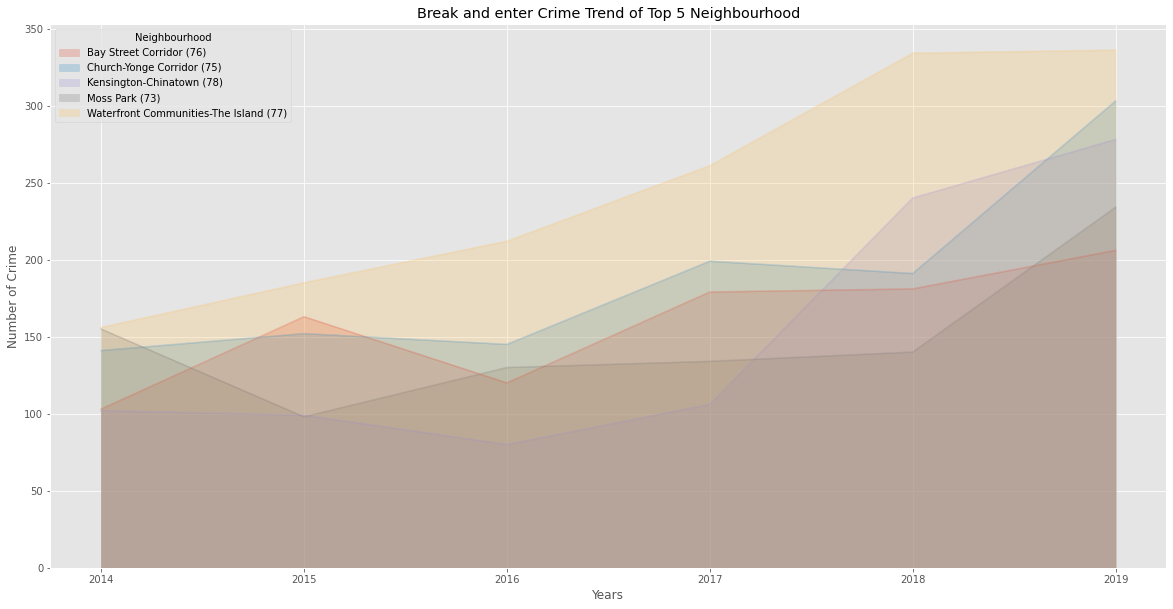

In [72]:

# stacked Histogram
final_df.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Break and enter Crime Trend of Top 5 Neighbourhood')
plt.ylabel('Number of Crime')
plt.xlabel('Years')

plt.show()

we can see from the chart, all five areas the crime are on the trend, and the water front community (77) are higher than the other area.

Now let's analyze the premise type situation.

In [109]:
tor_crime_df['premisetype'].value_counts()

House         15322
Commercial    13682
Apartment     11648
Other          2626
Outside          24
Name: premisetype, dtype: int64

In [118]:
bar_df=tor_crime_df[["reportedyear",'premisetype']]
bar_df=bar_df.pivot_table(index='reportedyear',columns='premisetype',aggfunc=len)
bar_df=bar_df.transpose()
bar_df['Total'] = bar_df.sum(axis=1)
bar_df

reportedyear,2014,2015,2016,2017,2018,2019,Total
premisetype,,,,,,,
Apartment,1865.0,1982.0,1599.0,1818.0,1986.0,2398.0,11648.0
Commercial,1916.0,1933.0,1900.0,2118.0,2552.0,3263.0,13682.0
House,2941.0,2637.0,2495.0,2575.0,2505.0,2169.0,15322.0
Other,457.0,346.0,402.0,369.0,511.0,541.0,2626.0
Outside,NaN,2.0,2.0,2.0,3.0,15.0,24.0


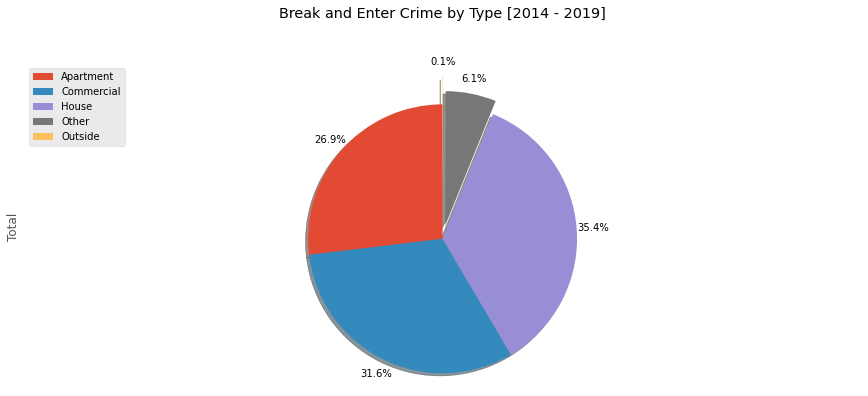

In [123]:
explode_list = [0.0, 0, 0, 0.1, 0.2]
bar_df['Total'].plot(kind='pie',
                           figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         
                            )
plt.title('Break and Enter Crime by Type [2014 - 2019]',y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=bar_df.index, loc='upper left') 

plt.show()

### Visualizing the crime for 2019 data

In [73]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [114]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

In [103]:
lastyear_df=tor_crime_df.loc[tor_crime_df['reportedyear']== 2019]
lastyear_df

,premisetype,reportedyear,reportedmonth,reporteddayofweek,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
27001,Apartment,2019,March,Friday,Break and Enter,D11,88,High Park North (88),43.653900,-79.464,27002
27002,Commercial,2019,October,Tuesday,Break and Enter,D14,78,Kensington-Chinatown (78),43.652554,-79.400,27003
27006,Apartment,2019,February,Thursday,Break and Enter,D22,16,Stonegate-Queensway (16),43.649609,-79.495,27007
27008,Apartment,2019,July,Monday,Break and Enter,D53,97,Yonge-St.Clair (97),43.687317,-79.398,27009
27017,Apartment,2019,January,Sunday,Break and Enter,D41,124,Kennedy Park (124),43.727463,-79.253,27018
...,...,...,...,...,...,...,...,...,...,...,...
43297,Commercial,2019,September,Sunday,Break and Enter,D31,21,Humber Summit (21),43.762623,-79.564,43298
43298,Apartment,2019,September,Saturday,Break and Enter,D22,18,New Toronto (18),43.595406,-79.506,43299
43299,Commercial,2019,October,Thursday,Break and Enter,D52,76,Bay Street Corridor (76),43.657909,-79.382,43300
43300,Apartment,2019,September,Monday,Break and Enter,D42,117,L'Amoreaux (117),43.799000,-79.306,43301


So the dataframe consists of 8386 crimes, which took place in the year 2019. In order to reduce computational cost, let's just work with the first 1000 incidents in this dataset.

In [104]:
# get the first 500 crimes in the df_incidents dataframe
limit = 500
lastyear_df = lastyear_df.iloc[0:limit, :]
lastyear_df

,premisetype,reportedyear,reportedmonth,reporteddayofweek,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
27001,Apartment,2019,March,Friday,Break and Enter,D11,88,High Park North (88),43.653900,-79.464,27002
27002,Commercial,2019,October,Tuesday,Break and Enter,D14,78,Kensington-Chinatown (78),43.652554,-79.400,27003
27006,Apartment,2019,February,Thursday,Break and Enter,D22,16,Stonegate-Queensway (16),43.649609,-79.495,27007
27008,Apartment,2019,July,Monday,Break and Enter,D53,97,Yonge-St.Clair (97),43.687317,-79.398,27009
27017,Apartment,2019,January,Sunday,Break and Enter,D41,124,Kennedy Park (124),43.727463,-79.253,27018
...,...,...,...,...,...,...,...,...,...,...,...
28357,Commercial,2019,August,Monday,Break and Enter,D14,82,Niagara (82),43.634075,-79.412,28358
28358,Commercial,2019,October,Monday,Break and Enter,D22,12,Markland Wood (12),43.635628,-79.562,28359
28363,Commercial,2019,May,Monday,Break and Enter,D53,99,Mount Pleasant East (99),43.710529,-79.380,28364
28364,House,2019,August,Friday,Break and Enter,D31,25,Glenfield-Jane Heights (25),43.756489,-79.513,28365


In [105]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(lastyear_df.Lat, lastyear_df.Long):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
map_toronto.add_child(incidents)

### Modeling: use KMeans clustering for the clsutering of the neighbourhoods

In [106]:
k=3
toronto_clustering = lastyear_df[['Lat','Long']]
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
lastyear_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [107]:
lastyear_df

,Cluster Labels,premisetype,reportedyear,reportedmonth,reporteddayofweek,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
27001,2,Apartment,2019,March,Friday,Break and Enter,D11,88,High Park North (88),43.653900,-79.464,27002
27002,0,Commercial,2019,October,Tuesday,Break and Enter,D14,78,Kensington-Chinatown (78),43.652554,-79.400,27003
27006,2,Apartment,2019,February,Thursday,Break and Enter,D22,16,Stonegate-Queensway (16),43.649609,-79.495,27007
27008,0,Apartment,2019,July,Monday,Break and Enter,D53,97,Yonge-St.Clair (97),43.687317,-79.398,27009
27017,1,Apartment,2019,January,Sunday,Break and Enter,D41,124,Kennedy Park (124),43.727463,-79.253,27018
...,...,...,...,...,...,...,...,...,...,...,...,...
28357,0,Commercial,2019,August,Monday,Break and Enter,D14,82,Niagara (82),43.634075,-79.412,28358
28358,2,Commercial,2019,October,Monday,Break and Enter,D22,12,Markland Wood (12),43.635628,-79.562,28359
28363,0,Commercial,2019,May,Monday,Break and Enter,D53,99,Mount Pleasant East (99),43.710529,-79.380,28364
28364,2,House,2019,August,Friday,Break and Enter,D31,25,Glenfield-Jane Heights (25),43.756489,-79.513,28365


In [108]:
# create map
map_clusters = folium.Map(location=[43.6534817, -79.3839347],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(lastyear_df['Lat'], lastyear_df['Long'], lastyear_df['Neighbourhood'], lastyear_df['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Result and Discussion

The objective of the problem was to help stakeholders identify the most dangerous borough in Torontoto purchase a house or commercial estate. This has been achieved by first making use of Toronto crime data. We achieved this by grouping the neighborhoods into clusters to assist the police or the government to decide different area to govern by providing them with relavent data.

### Conclusion

We have explored the crime data to understand break and enter crimes in all neighborhoods of Toronto and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the dangerous borough first. We can see from the chart that the the crime trend is on the rise, and the break and enter crime into house is the most common type. The most dangerous areas are concentrated in the downtown area. The whole crime map can be divided into 3 clusters to let police or govenment ot manage.